# k-means with Three different Distance Metrics by Using Feature Extraction
We will apply Feature Extraction to Iris data and compare three different Distance Metrics. 

# DISTANCE METRICS

# 1.Basic Euclidean Distance Metric:
Euclidean distance computes the root of square difference
between co-ordinates of pair of objects. 

$Distance=\sqrt{\left(\sum_{k=1}^m (x_{ik}-x_{jk} \right)^2)}$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df['euclidean']=np.sqrt(df.petal_length**2+df.petal_width**2)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,euclidean
0,5.1,3.5,1.4,0.2,setosa,1.414214
1,4.9,3.0,1.4,0.2,setosa,1.414214
2,4.7,3.2,1.3,0.2,setosa,1.315295
3,4.6,3.1,1.5,0.2,setosa,1.513275
4,5.0,3.6,1.4,0.2,setosa,1.414214


# 1.1. Find the cluster center:
Data point is assigned to the cluster center whose distance
from the cluster center is minimum of all the cluster centers. We are assuming we have 3 clusters.
$Center (x,y)=(\left(\sum_{i=1}^N \frac{x_i}{N}\right), \left(\sum_{i=1}^N \frac{y_i}{N}\right))$

Three different clusters will be plotted with three different color

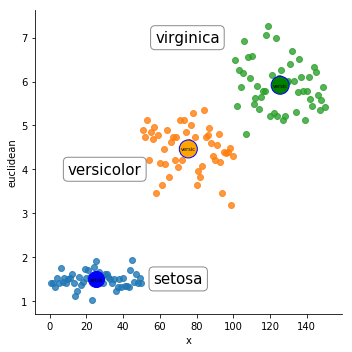

In [3]:
#plot to see clusters.  
x=[]
for i in range (1,151): 
    x.append(i)
df['x']=x
g=sns.lmplot( x='x', y="euclidean", data=df, fit_reg=False, hue='species', legend=False)
bbox_Circle = dict(boxstyle="Circle,pad=0.3", fc="b", ec="b", alpha=1)
plt.text(df[df.species=='setosa']['x'].mean(), df[df.species=='setosa']['euclidean'].mean(), "setos", ha="center", va="center", size=5,bbox=bbox_Circle)
bbox_Circle = dict(boxstyle="Circle,pad=0.3", fc="orange", ec="b", alpha=1)
plt.text(df[df.species=='versicolor']['x'].mean(), df[df.species=='versicolor']['euclidean'].mean(), "versic", ha="center", va="center", size=5,bbox=bbox_Circle)
bbox_Circle = dict(boxstyle="Circle,pad=0.3", fc="g", ec="b", alpha=1)
plt.text(df[df.species=='virginica']['x'].mean(), df[df.species=='virginica']['euclidean'].mean(), "versic", ha="center", va="center", size=5,bbox=bbox_Circle)

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
plt.text(70, 1.5, "setosa", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(30, 4, "versicolor", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(75, 7, "virginica", ha="center", va="center", size=15,bbox=bbox_props)

plt.show()

In [4]:
df['setosa']=np.sqrt((df.x-df[df.species=='setosa']['x'].mean())**2+(df.euclidean-df[df.species=='setosa']['euclidean'].mean())**2)
df['versicolor']=np.sqrt((df.x-df[df.species=='versicolor']['x'].mean())**2+(df.euclidean-df[df.species=='versicolor']['euclidean'].mean())**2)
df['virginica']=np.sqrt((df.x-df[df.species=='virginica']['x'].mean())**2+(df.euclidean-df[df.species=='virginica']['euclidean'].mean())**2)
def calculate_new_clusters(row):
    if (row["setosa"] < row['versicolor']) and (row['setosa']<row['virginica']):
        return 'setosa'
    elif(row['versicolor']<row['virginica']):
        return 'versicolor' 
    else:
        return 'virginica'
#applying function to df
df["Cluster"] = df.apply(calculate_new_clusters,axis=1)

In [5]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(df['species'], df['Cluster'])
pd.DataFrame(cnf_matrix)

,0,1,2
0,50,0,0
1,0,50,0
2,0,0,50


# 2. Manhattan Distance Metric

Manhattan distance computes the absolute differences between coordinates of pair of objects

$Distance=|x_i-x_j|$


In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df['Manhattan']=np.abs(df.petal_length-df.petal_width)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Manhattan
0,5.1,3.5,1.4,0.2,setosa,1.2
1,4.9,3.0,1.4,0.2,setosa,1.2
2,4.7,3.2,1.3,0.2,setosa,1.1
3,4.6,3.1,1.5,0.2,setosa,1.3
4,5.0,3.6,1.4,0.2,setosa,1.2


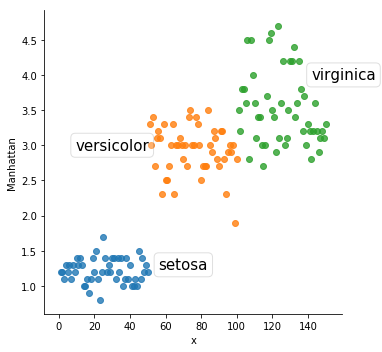

In [7]:
#plot to see clusters. 
x=[]
for i in range (1,151): 
    x.append(i)
df['x']=x
g=sns.lmplot( x='x', y="Manhattan", data=df, fit_reg=False, hue='species', legend=False)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.25)
plt.text(70, 1.3, "setosa", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(30, 3, "versicolor", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(160, 4, "virginica", ha="center", va="center", size=15,bbox=bbox_props)
plt.show()

In [8]:
df['setosa']=np.abs(df.x-df[df.species=='setosa']['x'].mean())+np.abs(df.Manhattan-df[df.species=='setosa']['Manhattan'].mean())
df['versicolor']=np.abs(df.x-df[df.species=='versicolor']['x'].mean())+np.abs(df.Manhattan-df[df.species=='versicolor']['Manhattan'].mean())
df['virginica']=np.abs(df.x-df[df.species=='virginica']['x'].mean())+np.abs(df.Manhattan-df[df.species=='virginica']['Manhattan'].mean())

#applying function to df
df["Cluster"] = df.apply(calculate_new_clusters,axis=1)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(df['species'], df['Cluster'])
pd.DataFrame(cnf_matrix)

,0,1,2
0,50,0,0
1,0,50,0
2,0,0,50


# 3. Minkowski Distance Metric

Minkowski Distance is the generalized metric distance. 

$Distance=\left(\sum_{k=1}^m (x_{ik}-x_{jk} \right)^p)^{1/p}$

Note that when p=2, the distance becomes the Euclidean
distance. When p=1 it becomes city block distance.
Chebyshev distance is a variant of Minkowski distance where
$p=\infty$ (taking a limit). This distance can be used for both
ordinal and quantitative variables.


In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
#for p=5
df['Minkowski']=(df.petal_length**5+df.petal_width**5)**(1/5)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Minkowski
0,5.1,3.5,1.4,0.2,setosa,1.400017
1,4.9,3.0,1.4,0.2,setosa,1.400017
2,4.7,3.2,1.3,0.2,setosa,1.300022
3,4.6,3.1,1.5,0.2,setosa,1.500013
4,5.0,3.6,1.4,0.2,setosa,1.400017


Text(160,6,'virginica')

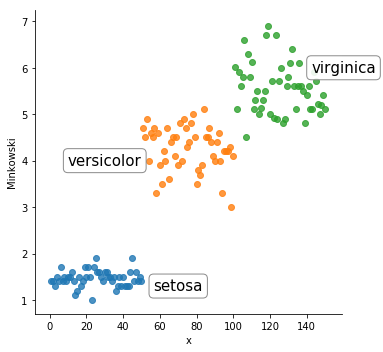

In [10]:
#plot to see cluster
x=[]
for i in range (1,151): 
    x.append(i)
df['x']=x
g=sns.lmplot( x='x', y="Minkowski", data=df, fit_reg=False, hue='species', legend=False)


bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
plt.text(70, 1.3, "setosa", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(30, 4, "versicolor", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(160, 6, "virginica", ha="center", va="center", size=15,bbox=bbox_props)

In [11]:
df['setosa']=(np.abs(df.x-df[df.species=='setosa']['x'].mean())**5+np.abs(df.Minkowski-df[df.species=='setosa']['Minkowski'].mean())**5)**(1/5)
df['versicolor']=(np.abs(df.x-df[df.species=='versicolor']['x'].mean())**5+np.abs(df.Minkowski-df[df.species=='versicolor']['Minkowski'].mean())**5)**(1/5)
df['virginica']=(np.abs(df.x-df[df.species=='virginica']['x'].mean())**5+np.abs(df.Minkowski-df[df.species=='virginica']['Minkowski'].mean())**5)**(1/5)

#applying function to df
df["Cluster"] = df.apply(calculate_new_clusters,axis=1)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(df['species'], df['Cluster'])
pd.DataFrame(cnf_matrix)

,0,1,2
0,50,0,0
1,0,50,0
2,0,0,50
